OCR with Pytesseract
Source: [Nanonets](https://nanonets.com/blog/ocr-with-tesseract/#introduction)

In [3]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [65]:
import matplotlib.pyplot as plt
import numpy as np

def get_var_name(variable):
    """Print the name of variable

    Args:
        variable (_type_): _description_

    Returns:
        _type_: String
        
    Examples:
        apple = 3
        print(get_var_name(apple))
        -> "apple"
    """
    globals_dict = globals()
    name = [var_name for var_name in globals_dict if globals_dict[var_name] is variable]
    return name[0]

def show_images(list_of_images:list, rows:int, columns:int, size_x:int=10, size_y:int=10):
    """
    Show all the images in the list
    Example:
        img_to_show = [img_bouding_rect, img_approx_poly]
        show_images(img_to_show,1,2,10,10)
    """
    if len(list_of_images)>(rows*columns):
        return "Check the input"
    plt.figure(figsize=(size_x, size_y))
    for i in range(len(list_of_images)):
        plt.subplot(rows, columns, i+1);plt.imshow(list_of_images[i]);plt.title(get_var_name(list_of_images[i]));

# Test Preprocessing with Tesseract

-  cv2.THRESH_OTSU and cv2.threshold: [Opencv24](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)

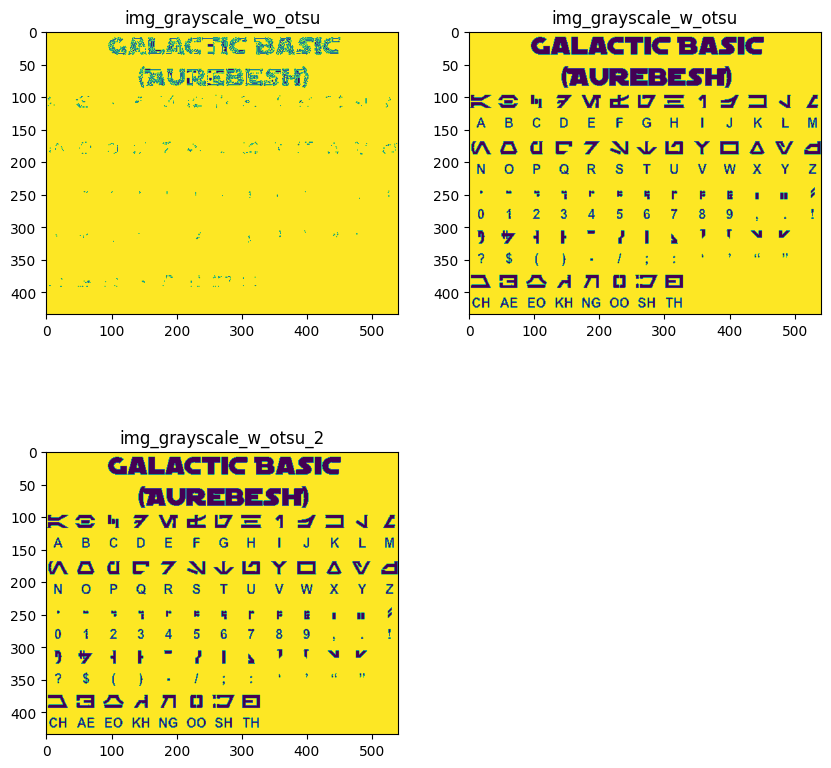

In [86]:
img = cv2.imread("images/aurebesh.jpg",1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_grayscale = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

_, img_grayscale_wo_otsu = cv2.threshold(img_grayscale,0 ,255, cv2.THRESH_BINARY)
_, img_grayscale_w_otsu = cv2.threshold(img_grayscale, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, img_grayscale_w_otsu_2 = cv2.threshold(img_grayscale, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

list_of_images = [img_grayscale_wo_otsu, img_grayscale_w_otsu, img_grayscale_w_otsu_2]
show_images(list_of_images,2,2,10,10)

In [88]:
(img_grayscale_w_otsu == img_grayscale_w_otsu_2).all()

True

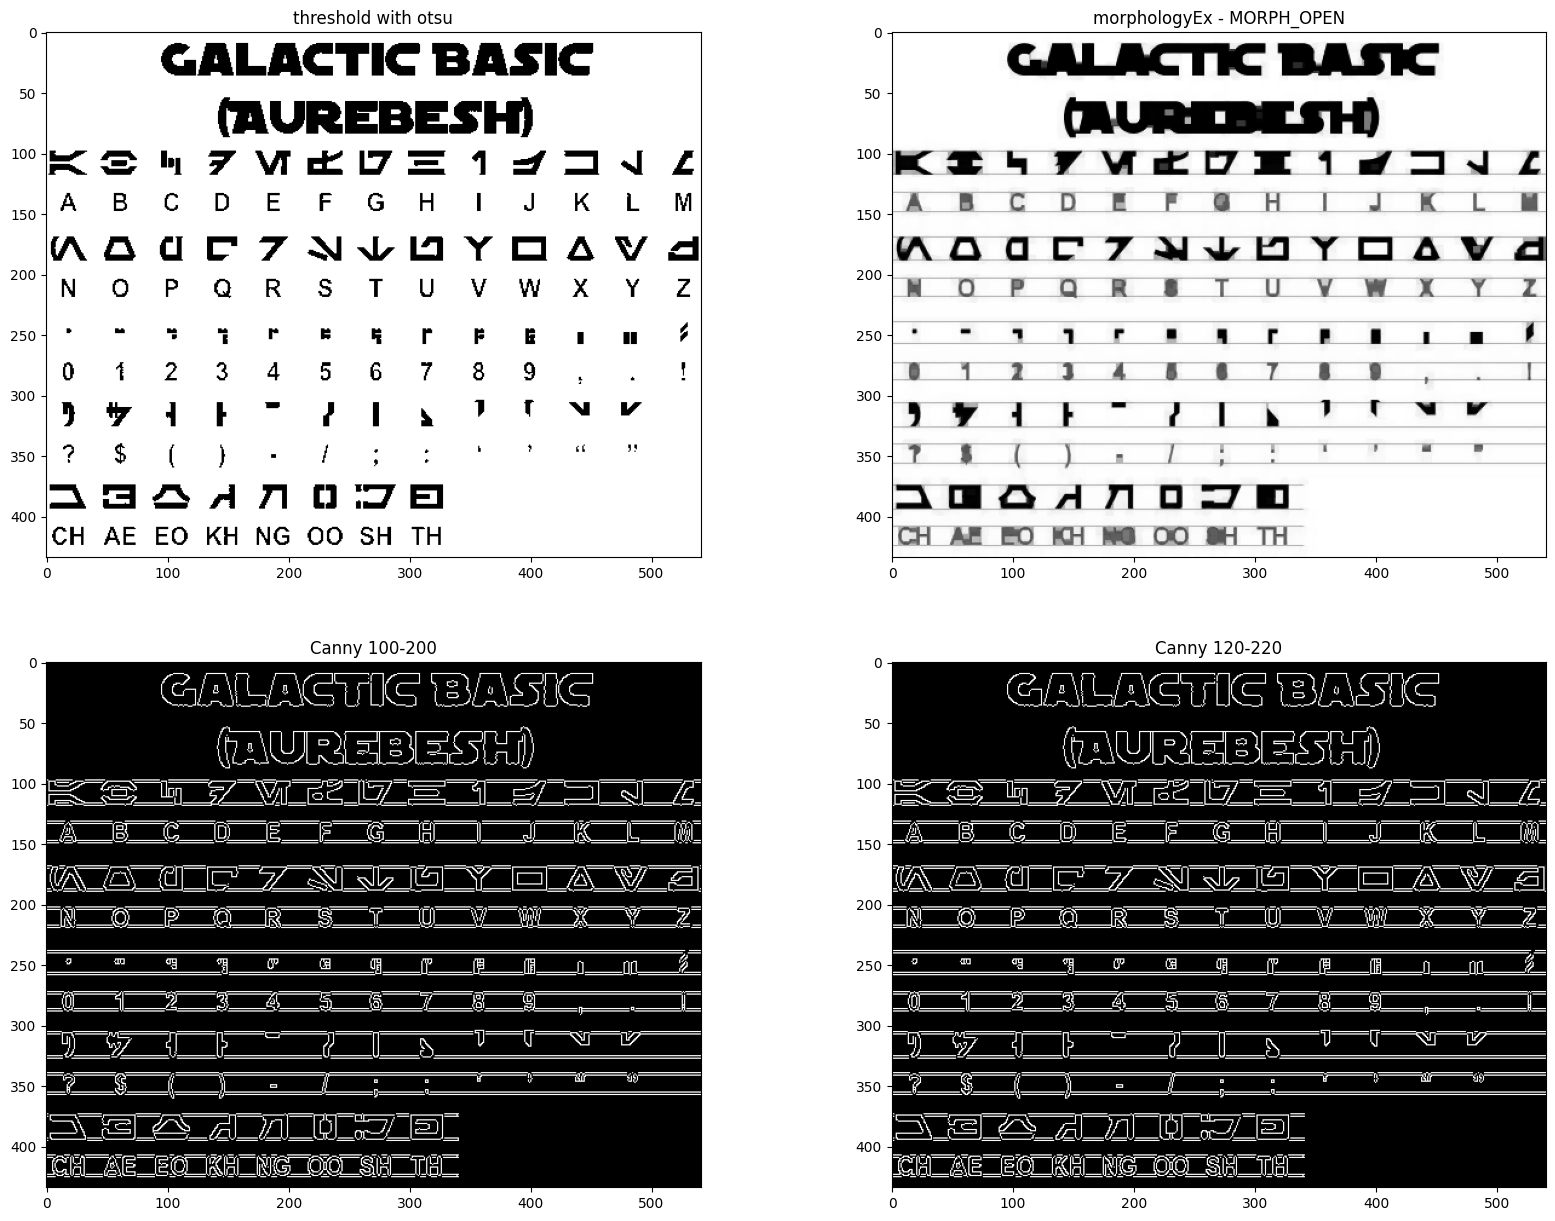

In [74]:
img = cv2.imread("images/aurebesh.jpg",1)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_grayscale = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

ret2, img_grayscale_w_otsu = cv2.threshold(img_grayscale, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# MORPH_OPEN
kernel_open = np.ones((5,5), np.uint8)
img_open = cv2.morphologyEx(img_grayscale, cv2.MORPH_OPEN, kernel_open)

# Canny
img_canny_100_200 = cv2.Canny(img_grayscale, 100, 200)
img_canny_120_220 = cv2.Canny(img_grayscale, 120, 220)

plt.figure(figsize=(20,15))
plt.subplot(2,2,1);plt.imshow(img_grayscale_w_otsu, cmap="gray");plt.title("threshold with otsu");
plt.subplot(2,2,2);plt.imshow(img_open, cmap="gray");plt.title("morphologyEx - MORPH_OPEN");
plt.subplot(2,2,3);plt.imshow(img_canny_100_200, cmap="gray");plt.title("Canny 100-200");
plt.subplot(2,2,4);plt.imshow(img_canny_120_220, cmap="gray");plt.title("Canny 120-220");

# Ocr with tesseract

## Ocr every letter

Getting boxes around text by using `pytesseract.image_to_boxes`

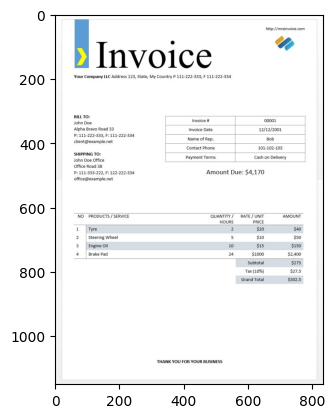

In [75]:
img = cv2.imread("images/invoice-sample.jpg",1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

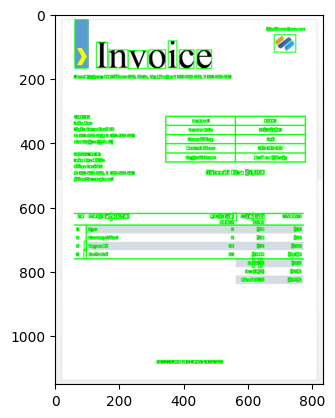

In [77]:
img = cv2.imread("images/invoice-sample.jpg",1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)

h,w,c = img.shape

# Get bounding box
boxes = pytesseract.image_to_boxes(img)
# print(f"Boxes: {boxes}")
for b in boxes.splitlines():
    b = b.split(' ')
    # print(b)
    img = cv2.rectangle(img, (int(b[1]),h-int(b[2])), 
                        (int(b[3]), h-int(b[4])), (0,255,0),2)
    
plt.imshow(img)    

## Ocr by words

In [98]:
from pytesseract import Output
import random

img = cv2.imread("images/invoice-sample.jpg",1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(f"Keys (d.keys()): {d.keys()}\n")
print(f"d['conf']: {d['conf']}\n")
print(f"d['text']: {d['text']}\n")

Keys (d.keys()): dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

d['conf']: [-1, -1, -1, -1, 6, 96, -1, -1, -1, 89, 96, 92, 93, 95, 96, 96, 93, 92, 91, 69, 69, -1, -1, -1, 37, 37, -1, 96, 94, -1, -1, 90, 96, 88, 95, -1, -1, 78, 78, 90, 71, -1, 88, -1, -1, -1, 72, 95, -1, 96, 91, 92, -1, -1, 96, 92, 82, -1, -1, 70, 70, 84, 74, -1, 64, -1, -1, -1, 74, -1, -1, -1, 95, -1, -1, -1, 95, -1, -1, -1, 95, -1, -1, -1, 95, -1, -1, -1, 95, -1, -1, -1, 92, 92, 89, -1, 96, 90, 89, -1, 95, 96, 96, 95, -1, -1, 96, 96, 68, -1, -1, -1, 95, -1, -1, -1, 96, 96, -1, -1, -1, 95, -1, -1, -1, 95, -1, -1, -1, 94, 88, 88, -1, -1, -1, 95, -1, -1, -1, 95, -1, -1, -1, 96, 96, 96, -1, -1, -1, 95, -1, -1, -1, 95, -1, -1, -1, 95, -1, -1, -1, 95, -1, -1, -1, 41, 80, 93, 96, 87, 16, 16, 59, 93, 94, -1, 54, 94, -1, -1, 47, 23, 95, 95, 96, -1, -1, 9, 86, 77, 51, 96, 90, -1, -1, 49, 63, 88, 88, 93, 94, 93, -1, -1, 48, 48, 96, 86, 90, 95, 9

In [107]:
import random

for i in range(0,10):
    ran_num = random.randint(0, len(d["text"]))
    print(f"Random words: {d['text'][ran_num]}")
    print(f"Condident: {d['conf'][ran_num]}\n")

Random words: 
Condident: -1

Random words: QUANTITY
Condident: 87

Random words: 
Condident: -1

Random words: 
Condident: -1

Random words: Contact
Condident: 96

Random words: 101-102-103
Condident: 68

Random words: 
Condident: -1

Random words: 
Condident: -1

Random words: QUANTITY
Condident: 87

Random words: Road
Condident: 88



dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


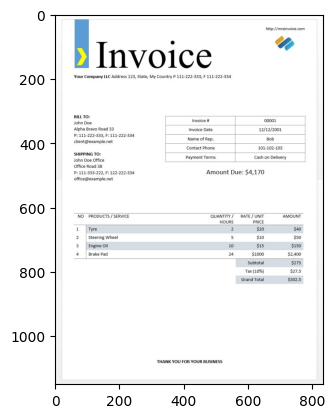

In [121]:
from pytesseract import Output
import random

img = cv2.imread("images/invoice-sample.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

plt.imshow(img)

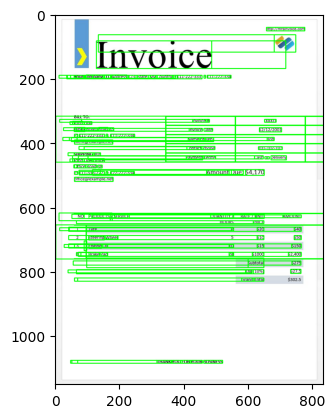

In [123]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        
plt.imshow(img)

## Text template matching

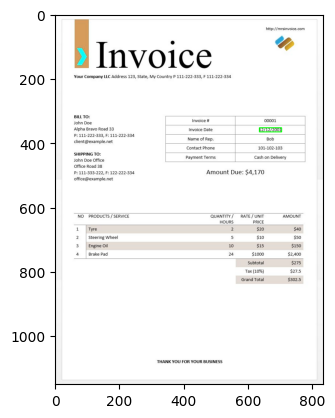

In [4]:
import re
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt

img = cv2.imread("images/invoice-sample.jpg")
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())
# print(d.keys())
# print(keys)

date_pattern = "^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$"

n_boxes = len(d["text"])
for i in range(n_boxes):
    if int(d["conf"][i]>60):
        if re.match(date_pattern, d["text"][i]):
            (x,y,w,h) = (d["left"][i], d["top"][i], d["width"][i], d["height"][i])
            img = cv2.rectangle(img, (x,y), (x+w,y+h),(0,255,0),2)
            
plt.imshow(img)

# Page segmentation modes

## Detect orientation and script
You can detect the orientation of text in your image and also the script in which it is written. The following image -

In [12]:
img = cv2.imread("images/hitchhikers-rotated.png")

osd = pytesseract.image_to_osd(img)
angle = re.search('(?<=Rotate: )\d+', osd).group(0)
script = re.search('(?<=Script: )\d+', osd)

print(f"Angle: {angle}")
print(f"Script: {script}")

Angle: 90
Script: None
